In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from tensorflow import feature_column as fc

In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [4]:
#Let's see the shape of our datasets
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [5]:
#Let's look at the data and the collumn names
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Look at some statistical values
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#See which collumns have NaN values
print(train_data.isnull().sum())
print('-'*20)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
#Wrtie mean value for age
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [9]:
#Get Cabin values
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
#Fill NaN Cabin values with new category.
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
test_data['Cabin'] = test_data['Cabin'].fillna('Unknown')

<AxesSubplot:ylabel='Frequency'>

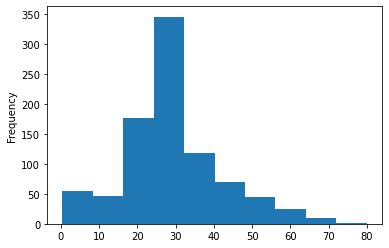

In [11]:
#Plot for age distribution
train_data['Age'].plot(kind = "hist")

<AxesSubplot:ylabel='Sex'>

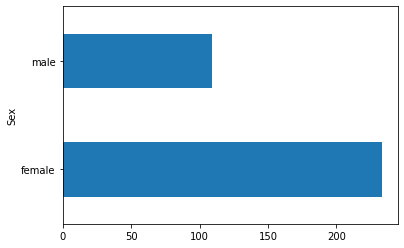

In [12]:
#Take a look at which gender is survived more
train_data.groupby(['Sex']).sum()['Survived'].plot(kind= 'barh')

<AxesSubplot:>

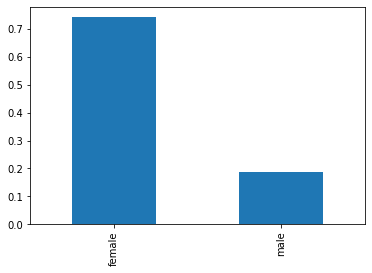

In [13]:
#Which percentage does the genders survive
x =  train_data.groupby(['Sex']).sum()['Survived'] / train_data['Sex'].value_counts()
x.plot(kind = 'bar')

<AxesSubplot:ylabel='Pclass'>

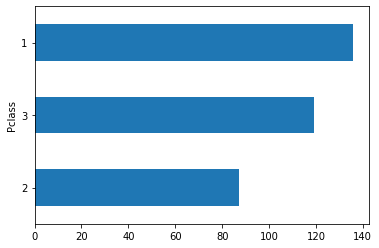

In [14]:
#Take a look at which class of passangers has survived more.
train_data.groupby(['Pclass']).sum()['Survived'].sort_values().plot(kind= 'barh')

<AxesSubplot:>

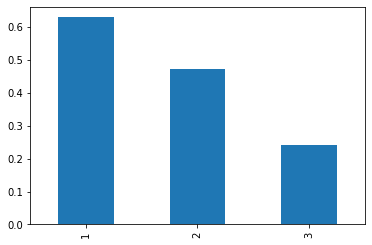

In [15]:
#Survival rates per classes.
x =  train_data.groupby(['Pclass']).sum()['Survived'] / train_data['Pclass'].value_counts()
x.plot(kind = 'bar')

<AxesSubplot:xlabel='Age', ylabel='Count'>

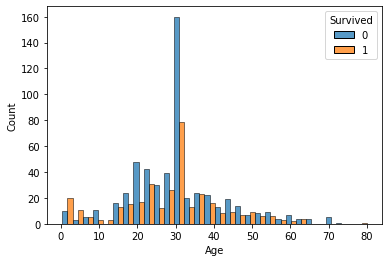

In [16]:
#Survival rate by age
sns.histplot(data = train_data, x = 'Age',hue = 'Survived',multiple="dodge")

In [17]:
#Drop unnecessary columns
train_data.drop(['Ticket'], axis = 1, inplace = True)
train_data.drop(['Embarked'], axis = 1, inplace = True)
train_data.drop(['Name'], axis = 1, inplace = True)

In [21]:
#Define our collumns to use as features.
CATEGORICAL_COLUMNS = ['Sex', 'SibSp','Parch','Pclass','Cabin']
NUMERIC_COLUMNS = ['Age', 'Fare']

In [22]:
#Create feature collumns
feature_columns = []

for f_name in CATEGORICAL_COLUMNS:
    vocabulary = train_data[f_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(f_name,vocabulary))
    
for f_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(f_name))

In [24]:
#Get our label values
train_y = train_data.pop('Survived')

In [25]:
#Define input function
def input_fn(data, label, epochs = 10, training = True, batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices((dict(data),label))
    if training:
        ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(epochs)
    return ds
        

In [26]:
#Use Linear Estimator to predict values
lin_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

In [27]:
#Train the estimator
lin_est.train(lambda:input_fn(train_data,train_y))

/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '

User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MA

In [28]:
#Input function for the test values
def eval_fn(data,batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices(dict(data))
    ds = ds.batch(batch_size)
    return ds

In [29]:
#Get Results
result = list(lin_est.predict(lambda:eval_fn(test_data)))

In [31]:
results = pd.DataFrame(result)
results

,logits,logistic,probabilities,class_ids,classes,all_class_ids,all_classes
0,[-2.3812232],[0.08461577],"[0.9153843, 0.08461578]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
1,[-0.14809445],[0.4630439],"[0.5369561, 0.4630439]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
2,[-2.227365],[0.09731984],"[0.9026801, 0.09731987]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
3,[-2.1547217],[0.10389078],"[0.89610916, 0.103890814]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
4,[0.7715564],[0.68385744],"[0.3161425, 0.68385744]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
...,...,...,...,...,...,...,...
413,[-2.2544942],[0.09496251],"[0.9050375, 0.09496251]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
414,[2.3048058],[0.9092743],"[0.090725735, 0.9092743]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
415,[-2.502533],[0.07568079],"[0.9243192, 0.0756808]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
416,[-2.2544942],[0.09496251],"[0.9050375, 0.09496251]",[0],[b'0'],"[0, 1]","[b'0', b'1']"


In [33]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': results['class_ids']})

In [34]:
output['Survived'] = output['Survived'].astype('str')
output

,PassengerId,Survived
0,892,[0]
1,893,[0]
2,894,[0]
3,895,[0]
4,896,[1]
...,...,...
413,1305,[0]
414,1306,[1]
415,1307,[0]
416,1308,[0]


In [35]:
output['Survived'] = output['Survived'].apply(lambda x: x[1:-1])

In [37]:
output.to_csv('submission.csv', index=False)